In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

E: Package 'python-software-properties' has no installation candidate


In [0]:
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
# !mkdir drive2/"Colab Notebooks"
# !google-drive-ocamlfuse drive2
# !ls -lla drive2/"Colab Notebooks"
# !ls -lla drive2/

In [0]:
# !cd content/drive/My\ Drive/
!pwd
%cd drive/
os.chdir("My Drive")
!ls

/content
/content/drive
 apps				'Бэкап диплома 2'
'Colab Notebooks'		'Вопросы по api.gdoc'
 im_base_to_angle_4.zip		 Диаграммы
 im_base_to_angle.zip		'Для работы с диаграммами'
 Test_upload_large_files.ipynb	 НИР_2_семестр_заключит_выступл
'Базы данных 2015'		 НИР_бэкап_18.09.18
'Бэкап Диплома'			 ТриНити


In [0]:
!unzip im_base_to_angle_4.zip

Archive:  im_base_to_angle_4.zip
   creating: rotated/
   creating: rotated/train/
   creating: rotated/train/1/
  inflating: rotated/train/1/65e4955c74884485ac010b7979dfe337.png  
  inflating: rotated/train/1/f9bb1fef39dd4d70b24df89c1fe595f7.png  
  inflating: rotated/train/1/fb8ab17a725e4bc1993dbddbda02e510.png  
  inflating: rotated/train/1/970d1cff10bc4f41a4772c5ad4de3d9a.png  
  inflating: rotated/train/1/a3bd85d0df9645d097615d79f53dbbfa.png  
  inflating: rotated/train/1/6bbb2c0b2d1e424fa4f3d8159312701d.png  
  inflating: rotated/train/1/b5eb68c633244cafaceed1576ce90617.png  
  inflating: rotated/train/1/f88a716f5cdf4b3897cedf9f9e218b24.png  
  inflating: rotated/train/1/3b8f718554fe42c28e7b458cd9b84ec9.png  
  inflating: rotated/train/1/234c7dcf37ef46678a17f405e5072200.png  
  inflating: rotated/train/1/d5e34d0128c34638b4680f727e37f5d4.png  
  inflating: rotated/train/1/a2e01549e15345dfa9264adceac4de7d.png  
  inflating: rotated/train/1/fca114745cfd4a58bf743132992343ad.png  
  i

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [0]:
# Old version

DATADIR = "content/drive/My Drive/rotated/train"

CATEGORIES = np.array([i for i in range(1, 361)])
np.array(map(str, CATEGORIES))
print(CATEGORIES)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

In [0]:
DATADIR = "rotated/train"

CATEGORIES_INT = [i for i in range(1, 361)]
CATEGORIES = [str(item) for item in CATEGORIES_INT]
# map(str, CATEGORIES)
print(CATEGORIES)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '

In [0]:
!pwd

/content/drive/My Drive


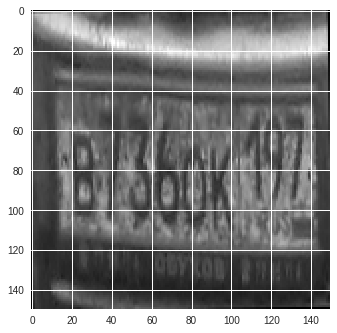

In [0]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [0]:
print(img_array)

[[  0   0   0 ...  84  59   0]
 [ 98 118 143 ...  95  67   0]
 [138 158 182 ...  99  73   0]
 ...
 [  0  40  61 ...  79  75  73]
 [  0  39  59 ...  64  66  64]
 [  0  37  57 ...   0   0   0]]


In [0]:
print(img_array.shape)

(150, 150)


In [0]:
IMG_SIZE = 50

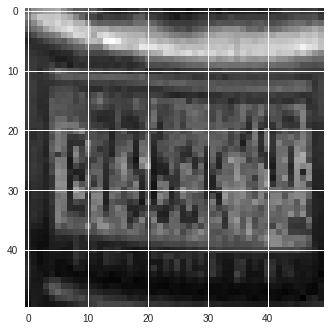

In [0]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [0]:
IMG_SIZE = 100

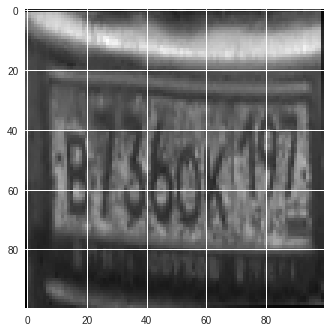

In [0]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [0]:
training_data = []

In [0]:
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats
                
        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

In [0]:
create_training_data()

100%|██████████| 40/40 [00:00<00:00, 209.23it/s]


In [0]:
print(len(training_data))

14400


In [0]:
import random

In [0]:
random.shuffle(training_data)

In [0]:
for sample in training_data[:10]:
    print(sample[1])

295
169
229
208
115
213
39
314
147
227


In [0]:
X = []
y = []

In [0]:
for features,label in training_data:
    X.append(features)
    y.append(label)

In [0]:
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]]


In [0]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [0]:
import pickle

In [0]:
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

In [0]:
pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [0]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

In [0]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

In [0]:
pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [0]:
X = X/255.0

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(1024, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(360))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 1024)      10240     
_________________________________________________________________
activation_4 (Activation)    (None, 98, 98, 1024)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 1024)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 512)       4719104   
_________________________________________________________________
activation_5 (Activation)    (None, 47, 47, 512)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 512)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 256)       1179904   
__________

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
model.fit(X, y, batch_size=32, epochs=15, validation_split=0.1)

Train on 12960 samples, validate on 1440 samples
Epoch 1/15
12960/12960 [==============================] - 200s 15ms/step - loss: 4.9145 - acc: 0.0301 - val_loss: 3.7892 - val_acc: 0.0729
Epoch 2/15
12960/12960 [==============================] - 200s 15ms/step - loss: 2.6098 - acc: 0.2096 - val_loss: 1.9651 - val_acc: 0.3236
Epoch 3/15
12960/12960 [==============================] - 200s 15ms/step - loss: 1.2982 - acc: 0.5291 - val_loss: 0.8941 - val_acc: 0.6660
Epoch 4/15
12960/12960 [==============================] - 200s 15ms/step - loss: 0.5865 - acc: 0.7932 - val_loss: 0.4742 - val_acc: 0.8403
Epoch 5/15
12960/12960 [==============================] - 200s 15ms/step - loss: 0.2890 - acc: 0.9049 - val_loss: 0.3200 - val_acc: 0.8924
Epoch 6/15
12960/12960 [==============================] - 200s 15ms/step - loss: 0.1798 - acc: 0.9429 - val_loss: 0.2039 - val_acc: 0.9347
Epoch 7/15
12960/12960 [==============================] - 200s 15ms/step - loss: 0.1283 - acc: 0.9594 - val_loss: 0.2

In [0]:
import json

In [0]:
model_json = model.to_json()
json_file = open("trained_model_angles.json", "w")
json_file.write(model_json)
json_file.close()

In [0]:
model.save_weights("trained_model_weights_angles.h5")